# **Importing the Required Libraries**

In [1]:
import os
import glob

In [2]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

In [ ]:
# To clear output in the notebook use clear_output function
#display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [3]:
!nvidia-smi

Tue Sep  5 20:40:14 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060         On | 00000000:09:00.0 Off |                  N/A |
|  0%   52C    P8               17W / 170W|    610MiB / 12288MiB |     28%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/home/fabio/Documents/Github/Yolov8/Aula_3


## **Installing Ultralytics using Pip Install**

**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
#!pip install ultralytics==8.0.0

## Checking whether YOLOv8 is Installed and its working Fine

In [5]:
import ultralytics

In [6]:
ultralytics.checks()

Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
Setup complete ✅ (8 CPUs, 23.4 GB RAM, 3.3/29.8 GB disk)


# **Importing the PPE Detection Dataset from Roboflow**

In [9]:
!mkdir {HOME}/datasets

In [10]:
!pwd

/home/fabio/Documents/Github/Yolov8/Aula_3


In [11]:
%cd {HOME}/datasets


/home/fabio/Documents/Github/Yolov8/Aula_3/datasets


In [12]:
!pwd

/home/fabio/Documents/Github/Yolov8/Aula_3/datasets


In [14]:
# https://universe.roboflow.com/object-detection/eep_detection-u9bbd
# !pip install roboflow

#!pip install roboflow
#from roboflow import Roboflow
#rf = Roboflow(api_key="4hIhYKGrnWHaWXRqZsZg")
#project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
#dataset = project.version(1).download("yolov5")

In [15]:
from roboflow import Roboflow
rf = Roboflow(api_key="zI9OTjbwPrkuQDUQXD8i")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.170, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to EEP_Detection-1 in yolov8:: 100%|██████████| 6482/6482 [00:00<00:00, 7195.70it/s]


# **Train the YOLOv8 Model on the Custom Dataset**

In [16]:
%cd {HOME}

/home/fabio/Documents/Github/Yolov8/Aula_3


In [17]:
%cd {dataset.location}

/home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [25]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={HOME}/datasets/EEP_Detection-1/data.yaml epochs=90 imgsz=640

/home/fabio/Documents/Github/Yolov8/Aula_3


New https://pypi.org/project/ultralytics/8.0.171 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/data.yaml, epochs=90, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_

In [ ]:

#!zip -r /content/rede_treinada.zip /content/runs/

In [ ]:
#!rm -r /content/content/
#!rm -r /content/rede_treinada.zip

rm: cannot remove '/content/rede_treinada.zip': No such file or directory


In [7]:
# !unrar x /content/runs.part1.rar  /content/

In [9]:
!ls {HOME}/runs/detect/train8

args.yaml		results.png	      train_batch11362.jpg
labels_correlogram.jpg	train_batch0.jpg      train_batch1.jpg
labels.jpg		train_batch11360.jpg  train_batch2.jpg
results.csv		train_batch11361.jpg  weights


# Validate custom model

In [11]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={HOME}/datasets/EEP_Detection-1/data.yaml

/home/fabio/Documents/Github/Yolov8/Aula_3
Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients
val: Scanning /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        647       3074      0.943      0.856      0.916       0.68
                     0        647        765      0.981      0.949      0.988      0.795
                    11        647         25       0.82        0.6      0.686      0.471
                     3        647        580      0.915      0.852      0.941      0.754
                     4        647        314      0.985      0.924       0.97      0.728
                     6        647        149      0.938      0.809      0.883      0.532
                     8        647        645      0.984      0.877      0.953      0.734
  

# **Displaying the Confusion Matrix**

/home/fabio/Documents/Github/Yolov8/Aula_3


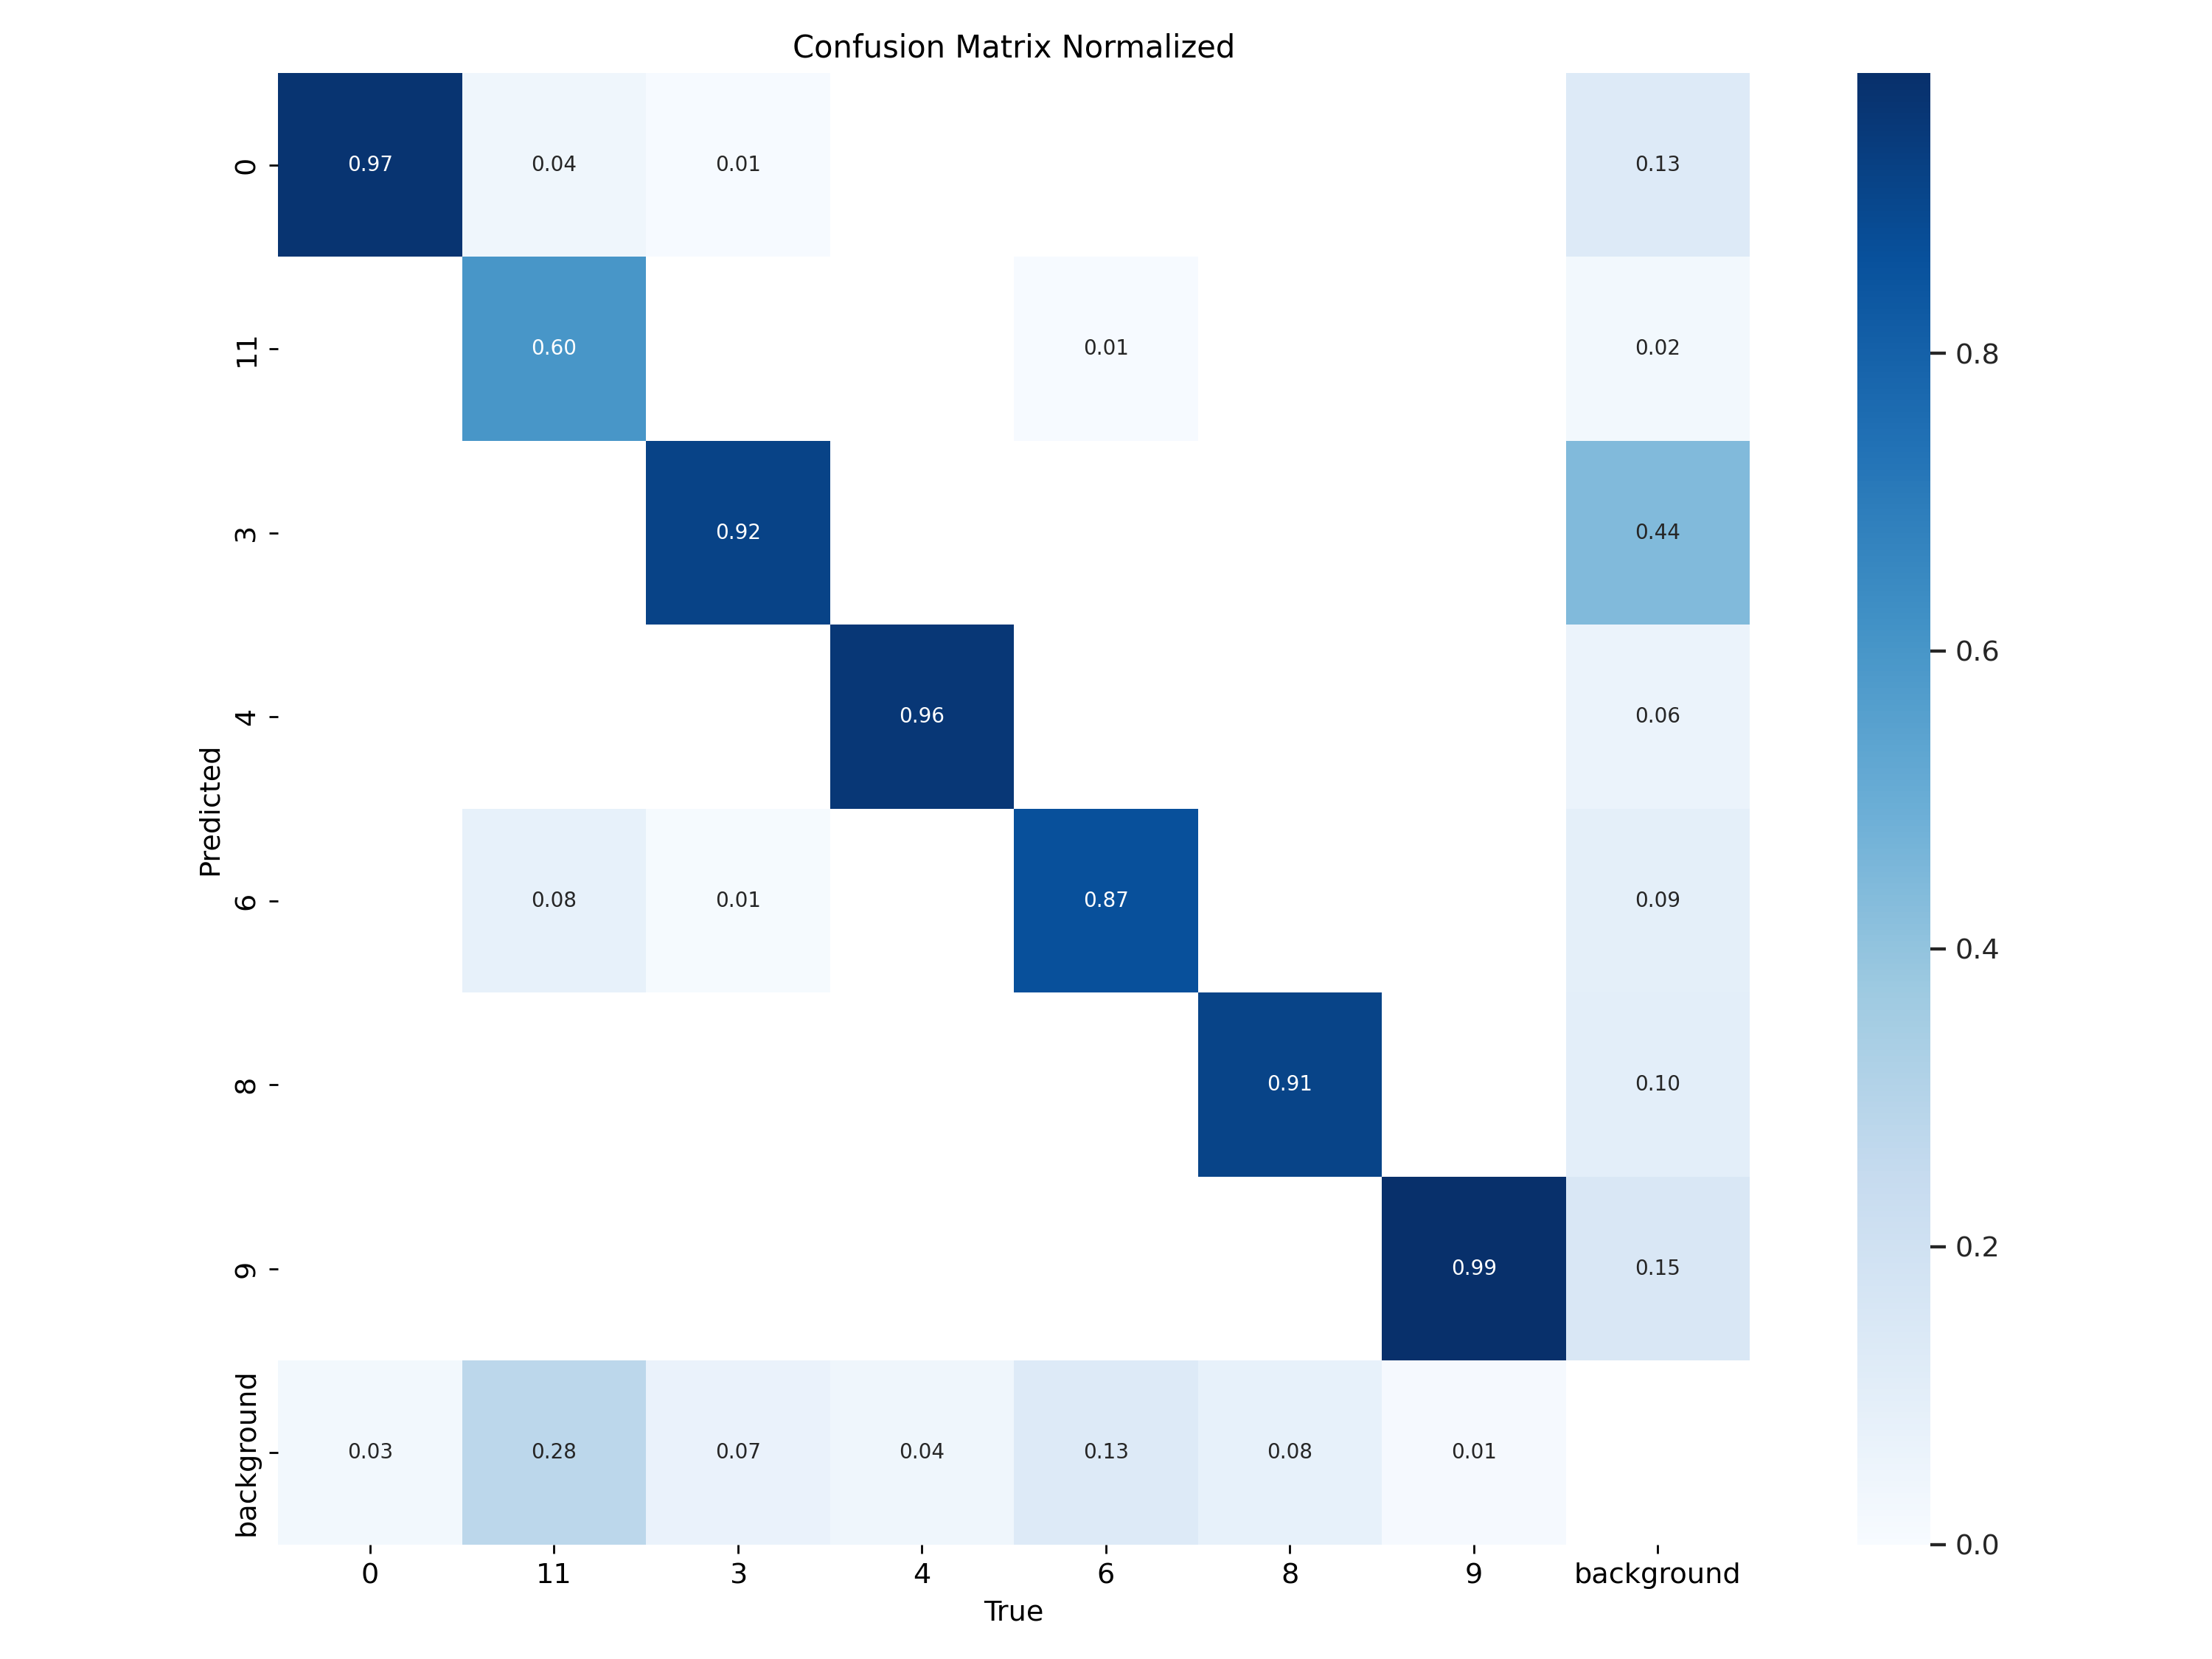

In [13]:
#Confusion matrix is the chart that shows how our model handles different classes
#92% of the time the model detected correctly that the person is wearing jacket, while 1% of the time we get the Bounding Box but
#the jacket is incorrectly classified as Eye wear, while 7% of the time when person is wearing the Jacket the model is unable to detect it
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix_normalized.png', width=900)

# **Training and Validation Loss**

/home/fabio/Documents/Github/Yolov8/Aula_3


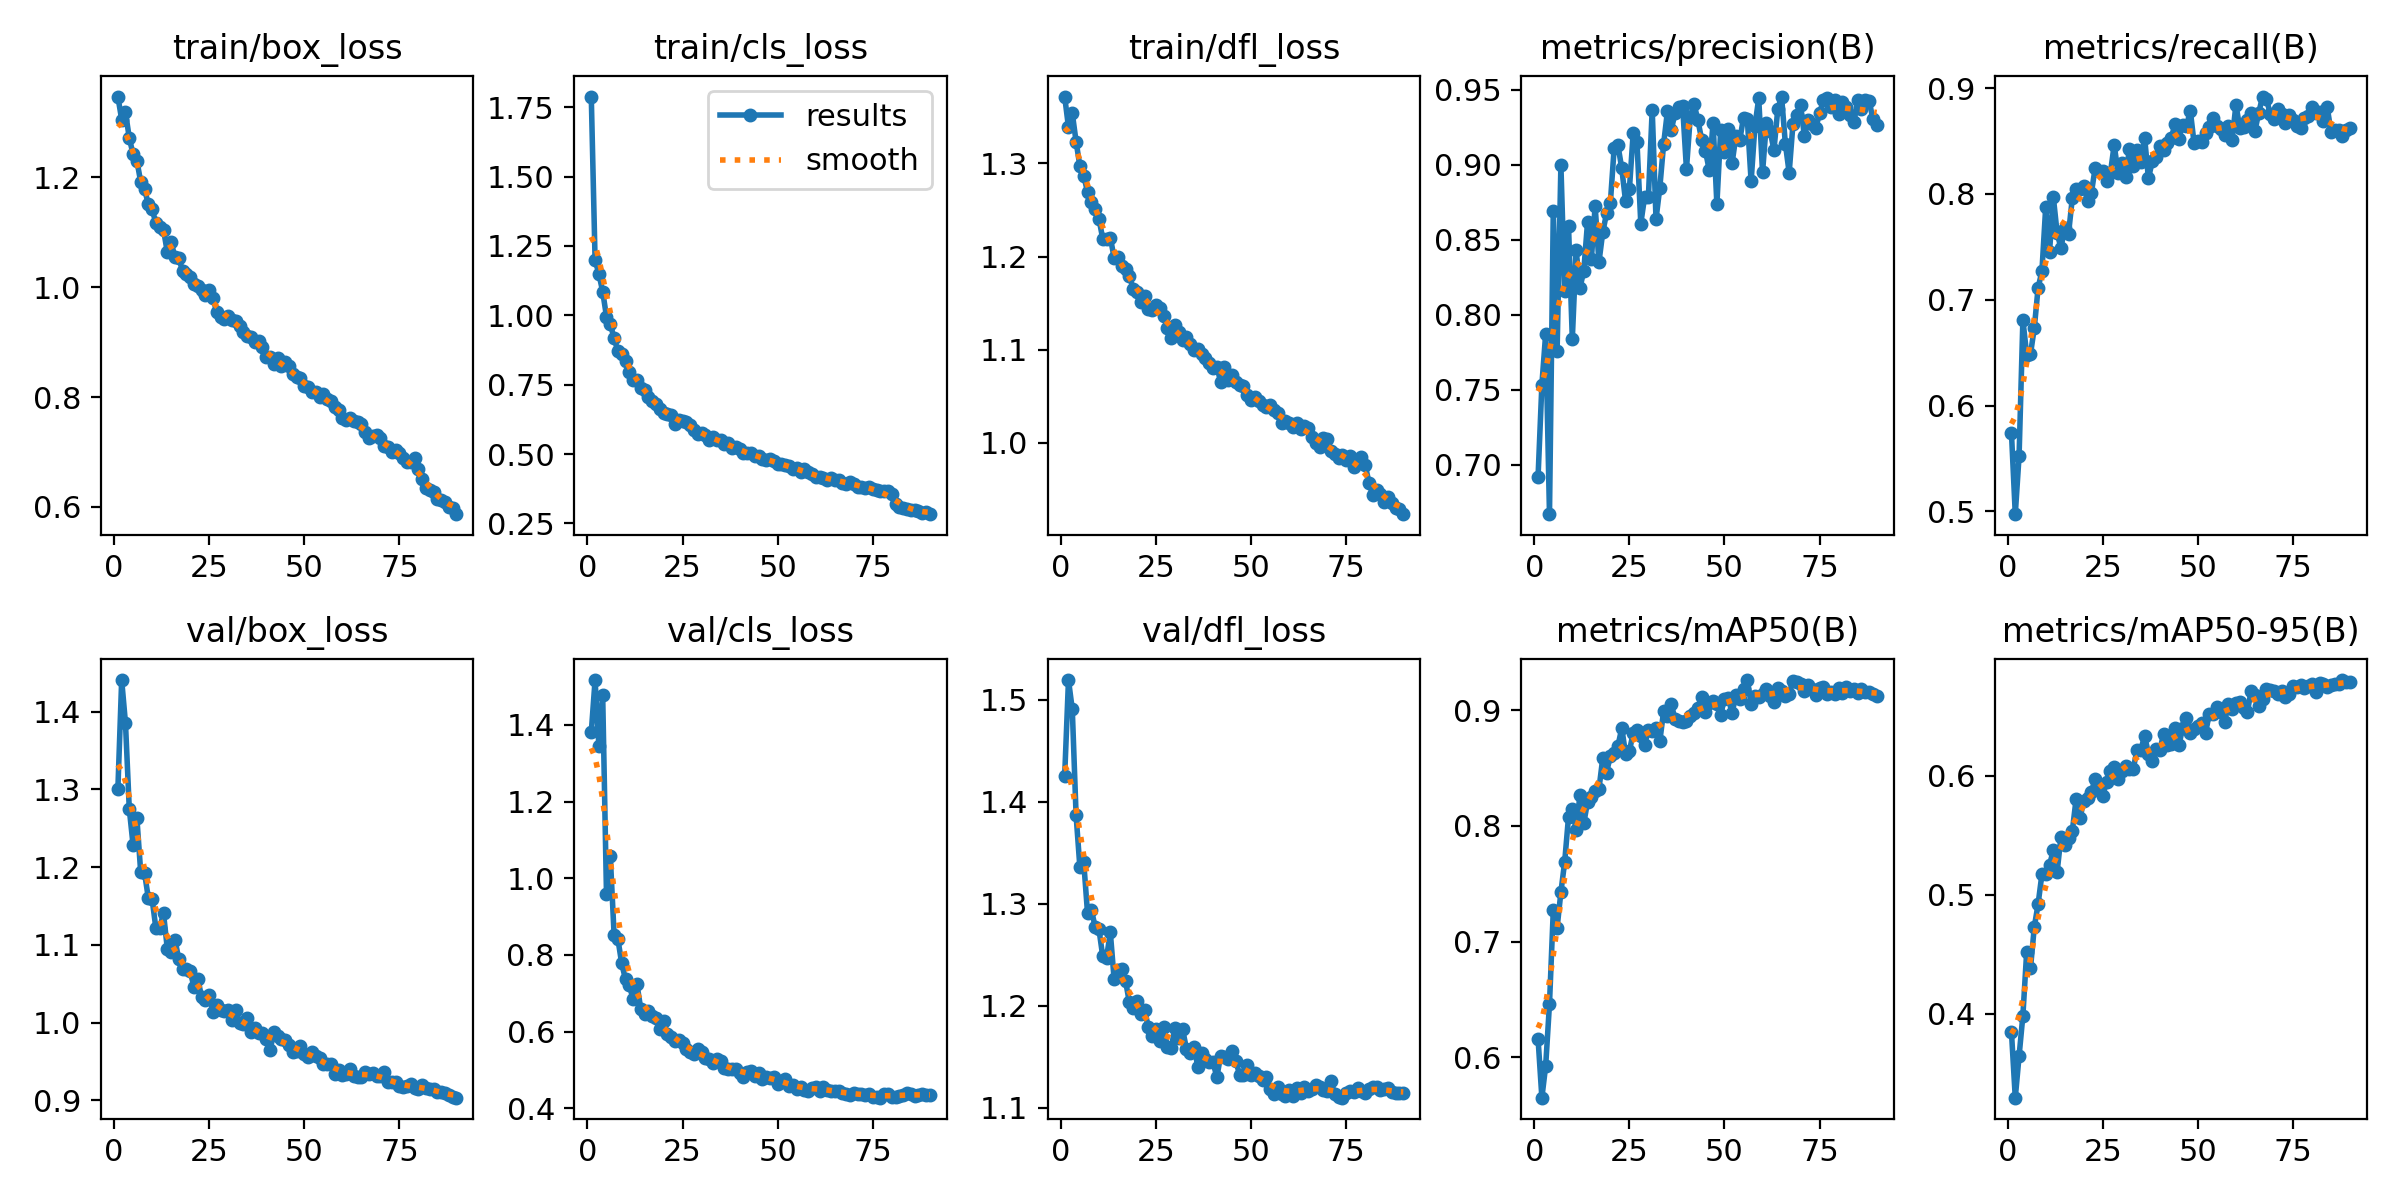

In [14]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/home/fabio/Documents/Github/Yolov8/Aula_3


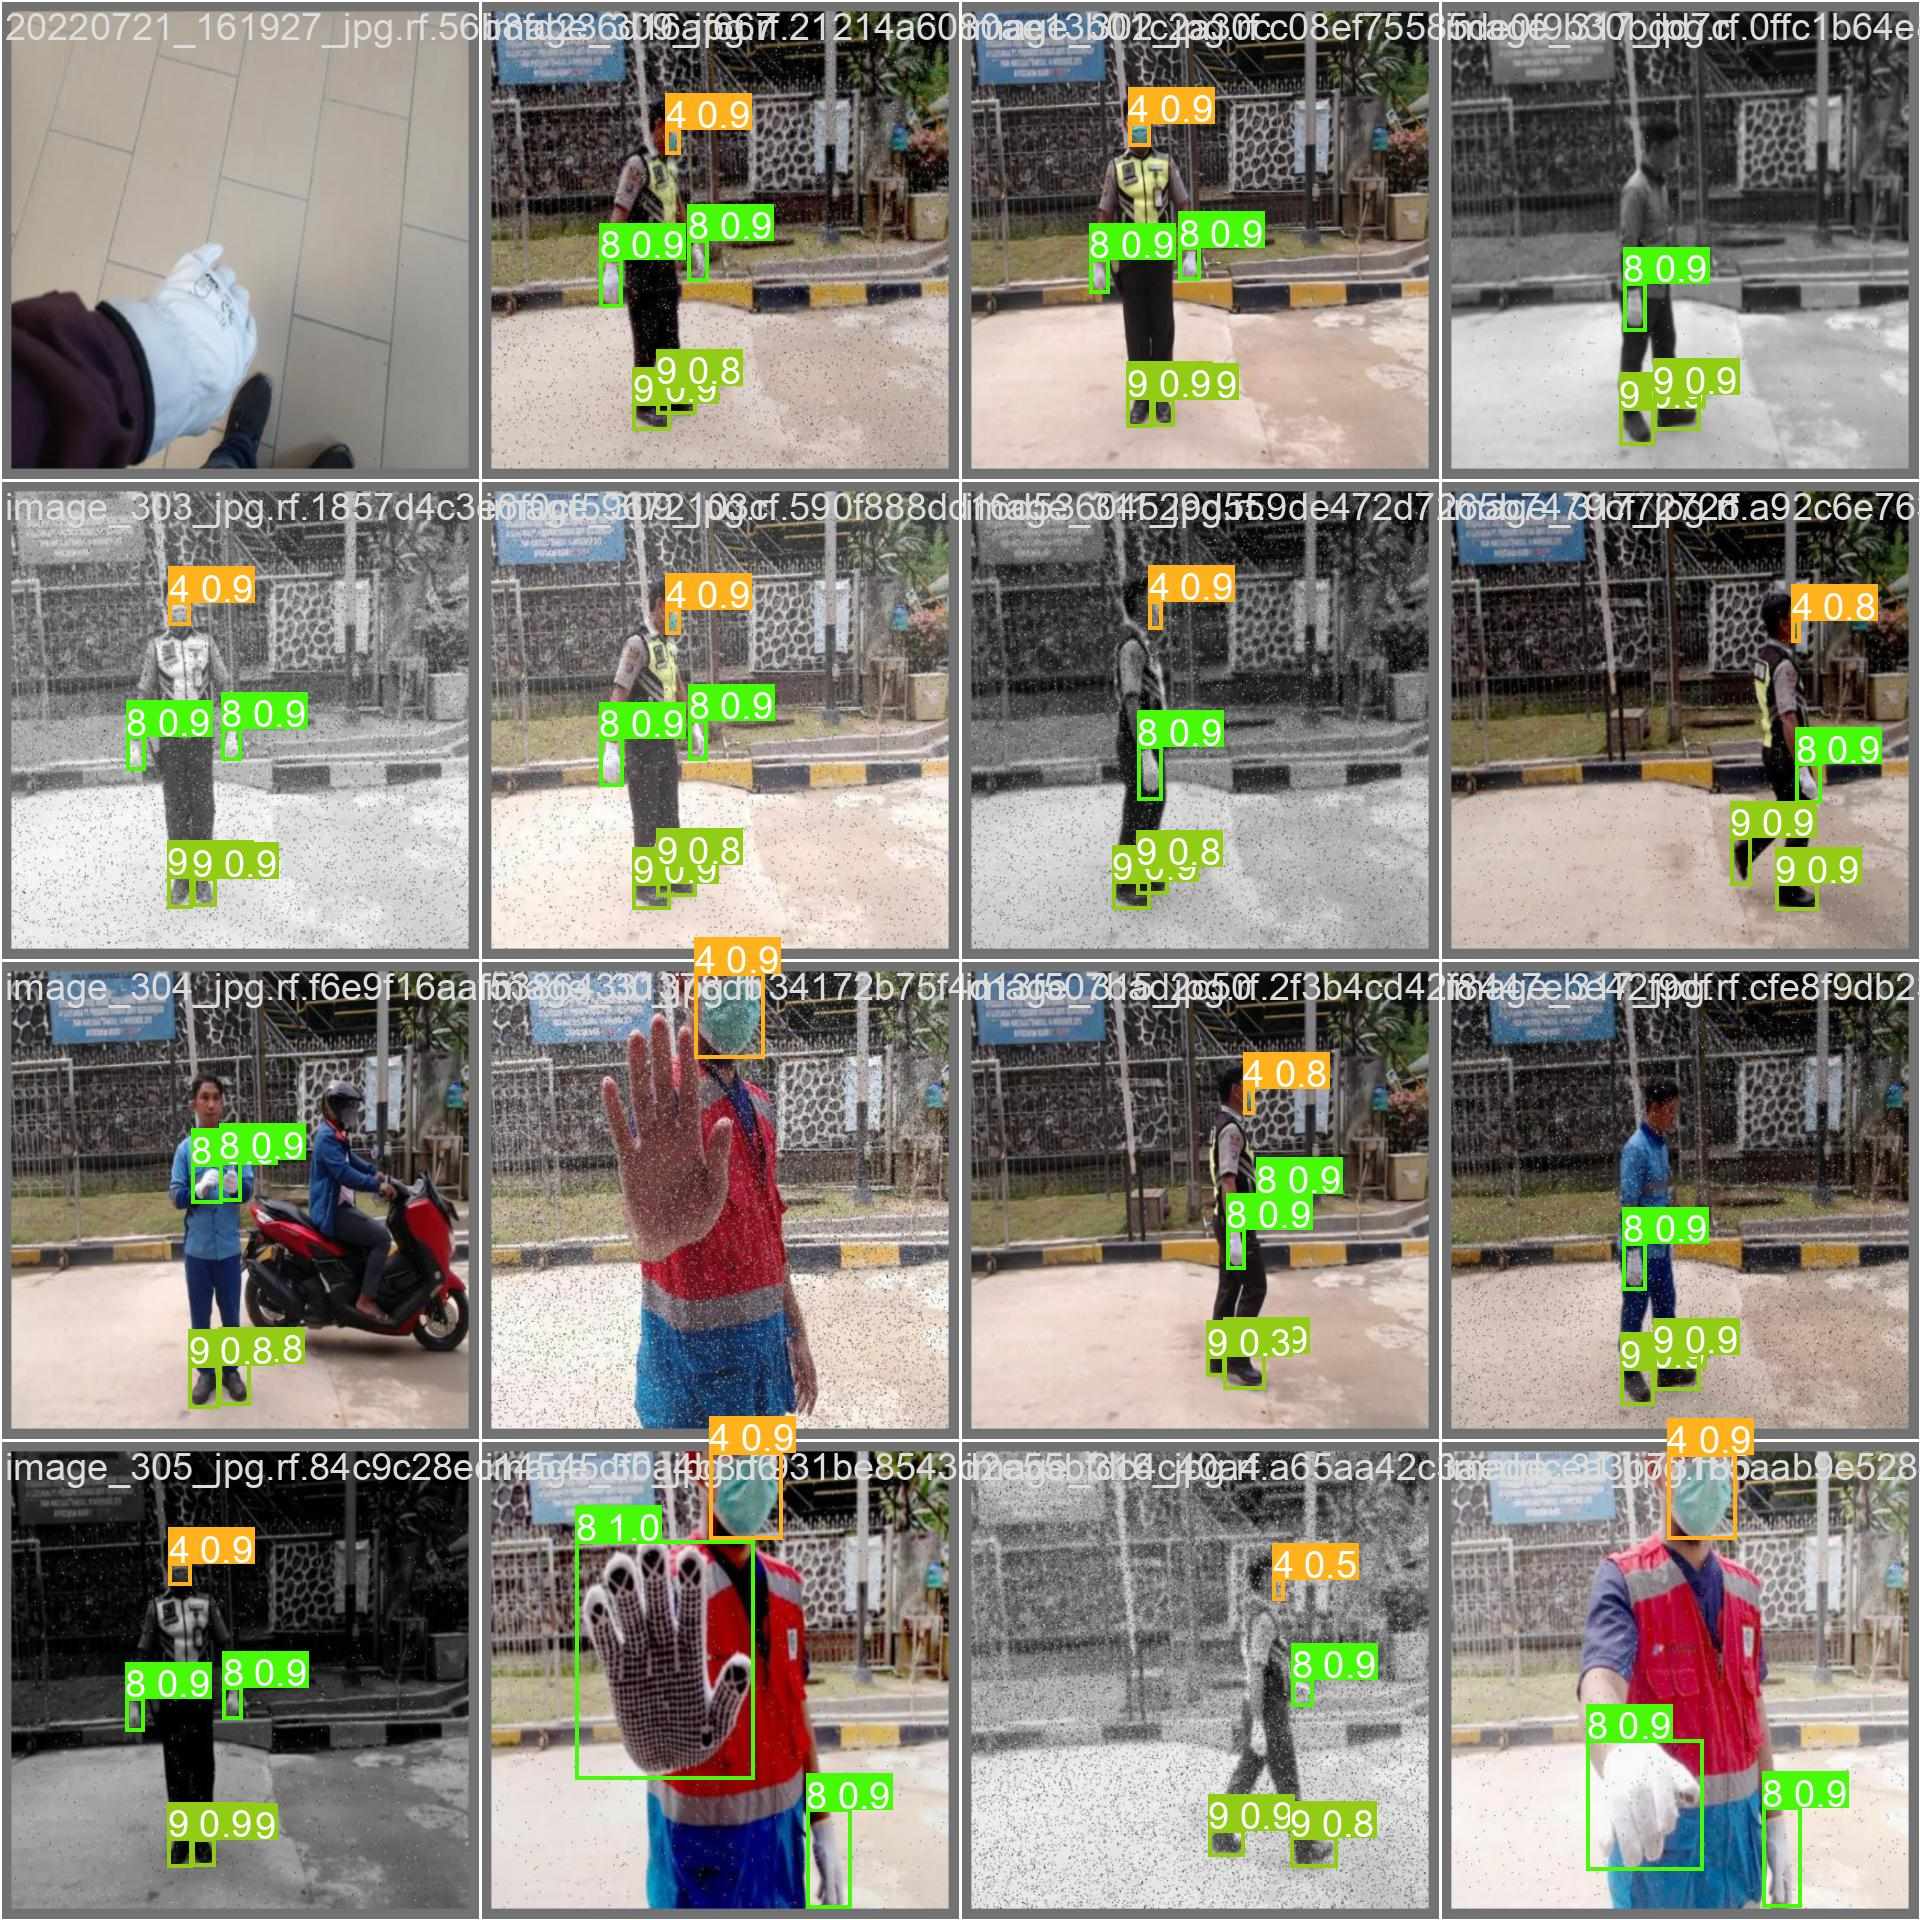

In [16]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

# **Inference with Custom Model**

In [19]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source='datasets/EEP_Detection-1/test/images'

/home/fabio/Documents/Github/Yolov8/Aula_3


Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients

image 1/324 /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/test/images/000446_jpg.rf.ae946a1122b8eaac534a4954f07b3755.jpg: 640x640 2 0s, 2 8s, 18.1ms
image 2/324 /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/test/images/20220721_161946_jpg.rf.149c26cf563aa2ace0bdc099c4af8fef.jpg: 640x640 (no detections), 17.8ms
image 3/324 /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/test/images/20220721_162015_jpg.rf.f71cba1429b26a3c95b6f8706ea69853.jpg: 640x640 1 4, 18.2ms
image 4/324 /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/test/images/20220721_162036_jpg.rf.f6b8fdbdef55ce36cd4ad61549b2c1e2.jpg: 640x640 1 4, 19.1ms
image 5/324 /home/fabio/Documents/Github/Yolov8/Aula_3/datasets/EEP_Detection-1/test/images/20220721_162308_jpg.rf.32a4cbe5e0f3

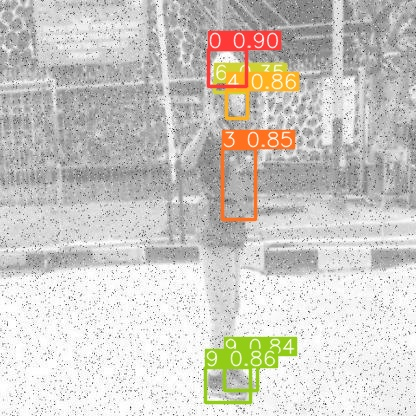

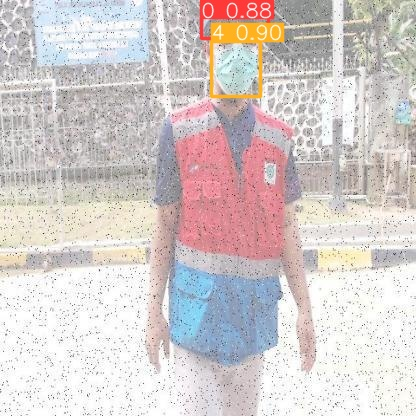

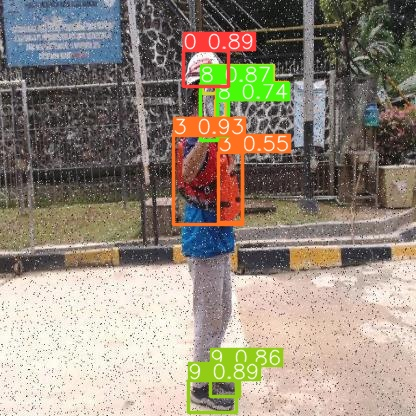

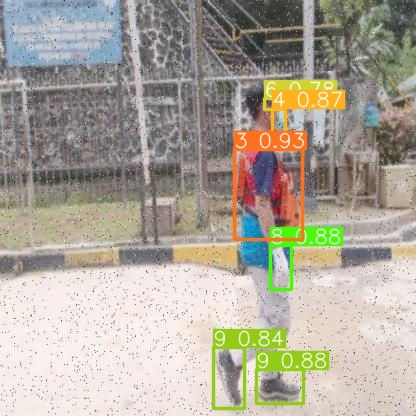

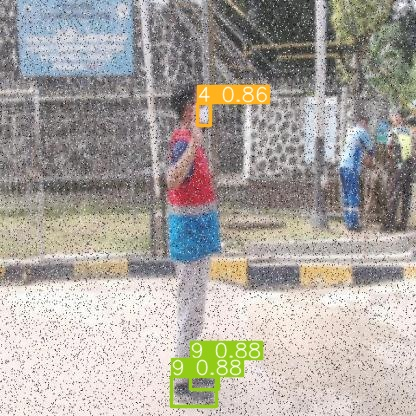

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")